In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import glob
import collections
# read top neurons
import yaml 
import sys  
sys.path.append('../')
from my_package.cma import get_topk
import os

/tmp/ipykernel_415189/2227021985.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import seaborn as sns
import pandas as pd 
top_neuron_path = '../../pickles/top_neurons/'
method_names = ['recent_baseline', 'baseline_fever','baseline_qqp_mysplit']
datasets_names = ['MNLI', 'FEVER',  'QQP'] 
seed = 1548
masking_mode = 'percent'
do = 'High-overlap'
key = 0.05
data = {}
df = {}

[None, None]

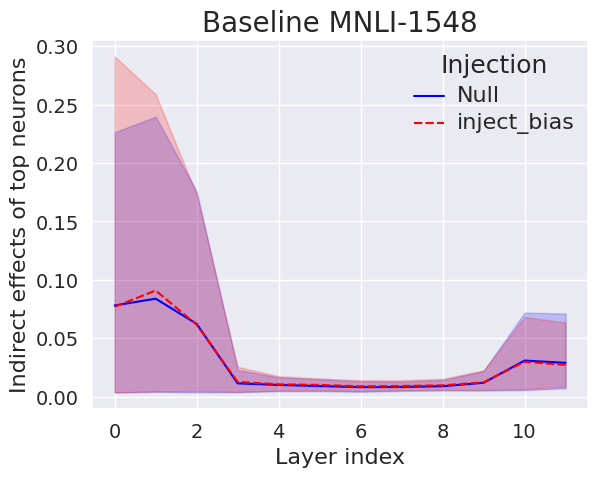

In [3]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 1548
x_layer = []
y_nie = []
line_type = []

for method_name, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )
    


data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

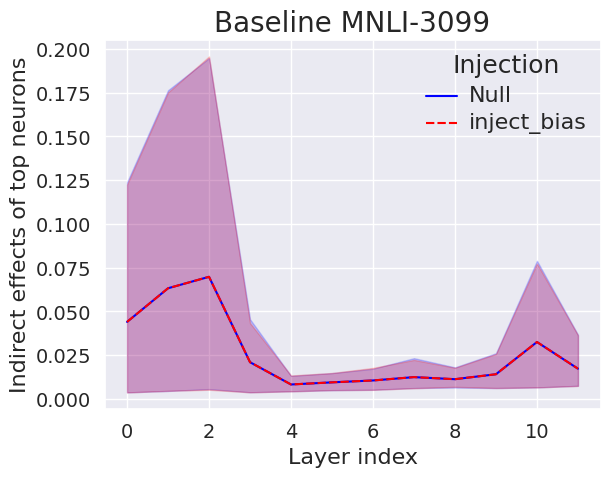

In [4]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 3099
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )


data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

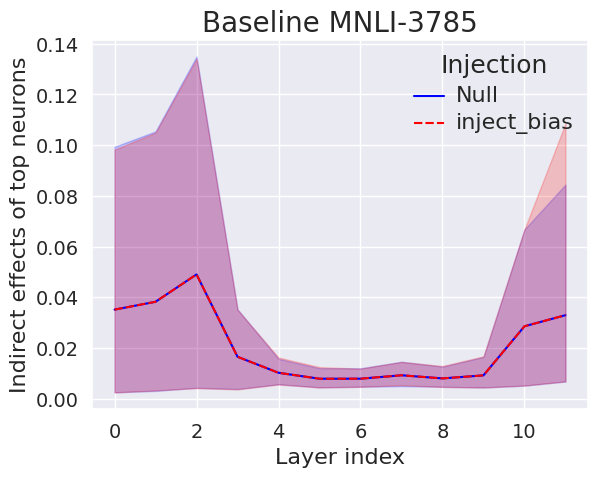

In [5]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 3785
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )



data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

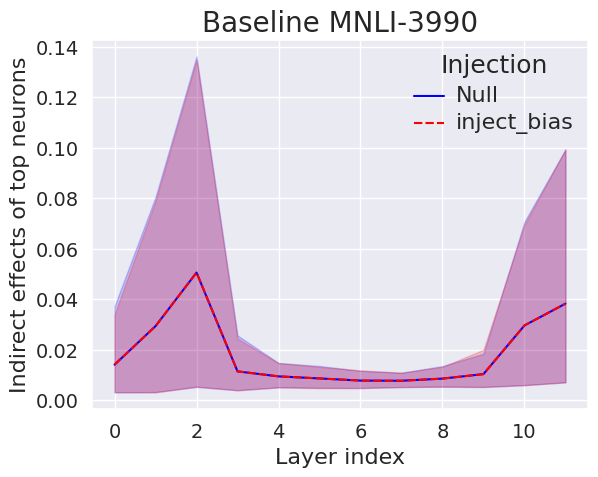

In [6]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 3990
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )


data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

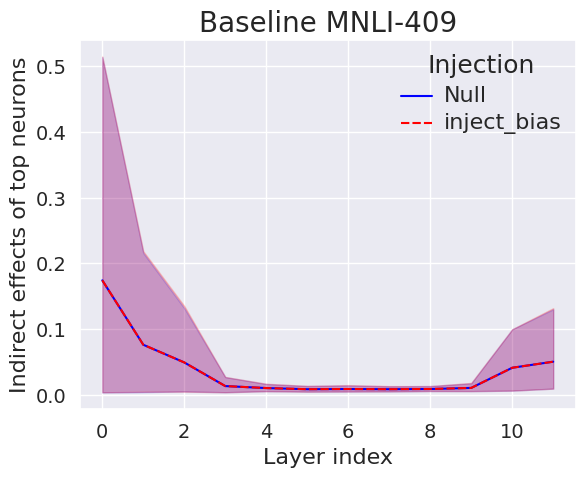

In [7]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 409
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )



data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title